C:\Users\agnes\AppData\Local\Temp\ipykernel_23376\737407655.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../dataset/rossmann-store-sales/train.csv')


Train shape: (1017209, 9)
Store shape: (1115, 10)
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


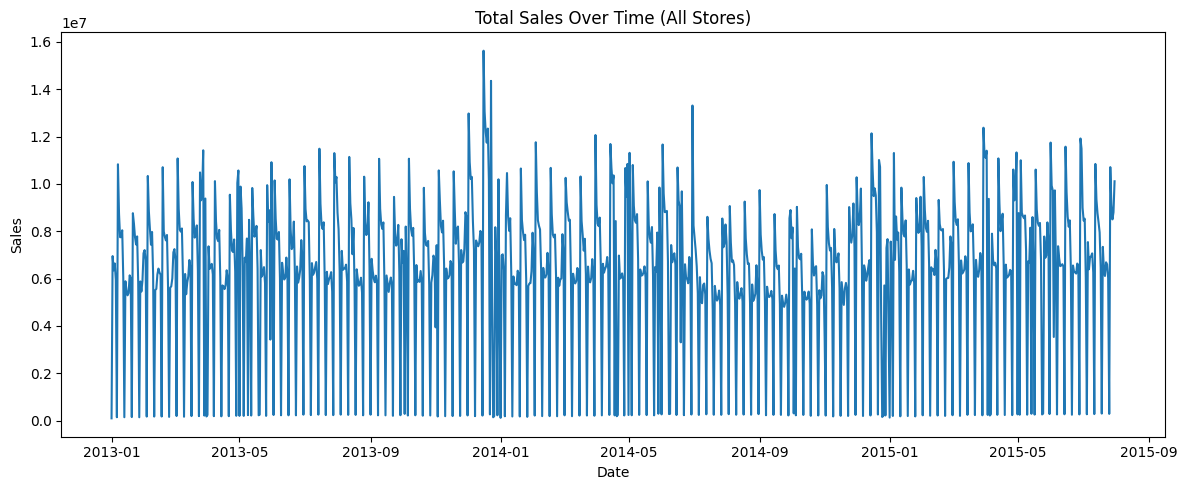

'\nEDA Tahap 1 - Insight:\n1. Pola mingguan yang kuat → penjualan naik turun secara periodik.\n2. Banyak nilai nol → toko tutup (Store closed / StateHoliday).\n3. Ada lonjakan (spikes) → kemungkinan besar karena promo & musim liburan.\n4. Data ini siap untuk analisis lanjutan: pengaruh hari, promo, dan holiday.\n'

In [12]:
# Fokus: Visualisasi total sales over time dan identifikasi pola dasar

# =========================================
# Import Library
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================
# Load Dataset
# =========================================
train = pd.read_csv('../dataset/rossmann-store-sales/train.csv')
store = pd.read_csv('../dataset/rossmann-store-sales/store.csv')

print("Train shape:", train.shape)
print("Store shape:", store.shape)

# =========================================
# Merge Store Info ke Train Data
# =========================================
df = pd.merge(train, store, on='Store', how='left')
df['Date'] = pd.to_datetime(df['Date'])
print(df.columns)

# =========================================
# Visualisasi Total Sales per Hari
# =========================================
daily_sales = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Total Sales Over Time (All Stores)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


# =========================================
# Catatan Awal / Insight
# =========================================
"""
EDA Tahap 1 - Insight:
1. Pola mingguan yang kuat → penjualan naik turun secara periodik.
2. Banyak nilai nol → toko tutup (Store closed / StateHoliday).
3. Ada lonjakan (spikes) → kemungkinan besar karena promo & musim liburan.
4. Data ini siap untuk analisis lanjutan: pengaruh hari, promo, dan holiday.
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = pd.read_csv('../dataset/rossmann-store-sales/train.csv')
store = pd.read_csv('../dataset/rossmann-store-sales/store.csv')

df = pd.merge(train, store, on='Store', how='left')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Open'] == 1]  # only open stores
df = df[df['Sales'] > 0]  # remove days with zero sales

df.info()
df.head()

plt.figure(figsize=(14,6))
plt.plot(df.groupby('Date')['Sales'].sum())
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


C:\Users\agnes\AppData\Local\Temp\ipykernel_23376\2904722844.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../dataset/rossmann-store-sales/train.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        842152 non-null  float64     

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
